In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import MinMaxScaler


import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':16,
         'ytick.labelsize':16}
pylab.rcParams.update(params)

In [15]:
df = pd.read_csv('Data/AMZN.csv', index_col='Date')
temp_df = df.reset_index()['Close']

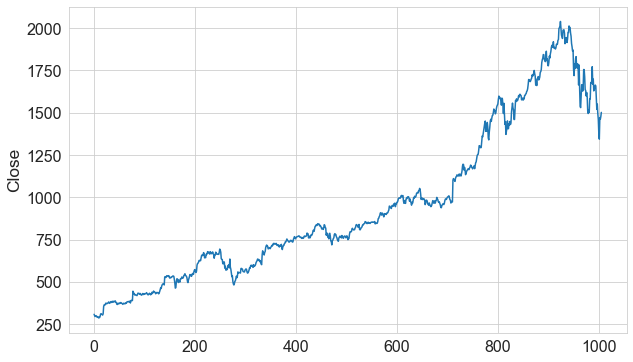

In [16]:
plt.ylabel('Close')
plt.plot(temp_df)

In [17]:
scaler = MinMaxScaler(feature_range=(0,1))
temp_df = scaler.fit_transform(np.array(temp_df).reshape(-1,1))
train_df, test_df = temp_df[0:755,:], temp_df[755:,:]

In [18]:
def create_truncation(df, window_size = 60):
    x, y = [], []
    for i in range(len(df) - window_size - 1):
        feat = df[i:(i+window_size)]
        x.append(feat)
        y.append(df[i+window_size])
    return np.array(x), np.array(y)

In [19]:
x_train, y_train = create_truncation(train_df, 60)
x_test, y_test = create_truncation(test_df, 60)

In [20]:
model=Sequential()
model.add(LSTM(50,input_shape=(60,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [21]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=500, batch_size = 64, verbose = 1)

Epoch 1/500
11/11 [==============================] - 1s 59ms/step - loss: 0.0606 - val_loss: 0.1227
Epoch 2/500
11/11 [==============================] - 0s 20ms/step - loss: 0.0071 - val_loss: 0.0385
Epoch 3/500
11/11 [==============================] - 0s 20ms/step - loss: 0.0037 - val_loss: 0.0775
Epoch 4/500
11/11 [==============================] - 0s 22ms/step - loss: 0.0029 - val_loss: 0.0197
Epoch 5/500
11/11 [==============================] - 0s 24ms/step - loss: 0.0020 - val_loss: 0.0148
Epoch 6/500
11/11 [==============================] - 0s 21ms/step - loss: 0.0013 - val_loss: 0.0053
Epoch 7/500
11/11 [==============================] - 0s 22ms/step - loss: 6.9498e-04 - val_loss: 0.0033e-
Epoch 8/500
11/11 [==============================] - 0s 21ms/step - loss: 4.1160e-04 - val_loss: 0.0092
Epoch 9/500
11/11 [==============================] - 0s 19ms/step - loss: 2.8266e-04 - val_loss: 0.0170
Epoch 10/500
11/11 [==============================] - 0s 20ms/step - loss: 2.6529e-04 

11/11 [==============================] - 0s 19ms/step - loss: 1.8098e-04 - val_loss: 0.0019
Epoch 80/500
11/11 [==============================] - 0s 21ms/step - loss: 1.7165e-04 - val_loss: 0.0018
Epoch 81/500
11/11 [==============================] - 0s 19ms/step - loss: 1.6767e-04 - val_loss: 0.0017
Epoch 82/500
11/11 [==============================] - 0s 19ms/step - loss: 1.6853e-04 - val_loss: 0.0017
Epoch 83/500
11/11 [==============================] - 0s 19ms/step - loss: 1.6694e-04 - val_loss: 0.0018
Epoch 84/500
11/11 [==============================] - 0s 19ms/step - loss: 1.6959e-04 - val_loss: 0.0019
Epoch 85/500
11/11 [==============================] - 0s 19ms/step - loss: 1.7177e-04 - val_loss: 0.0016
Epoch 86/500
11/11 [==============================] - 0s 19ms/step - loss: 1.6660e-04 - val_loss: 0.0015
Epoch 87/500
11/11 [==============================] - 0s 20ms/step - loss: 1.6764e-04 - val_loss: 0.0015
Epoch 88/500
11/11 [==============================] - 0s 18ms/step -

11/11 [==============================] - 0s 20ms/step - loss: 1.3486e-04 - val_loss: 0.0012
Epoch 157/500
11/11 [==============================] - 0s 20ms/step - loss: 1.4653e-04 - val_loss: 0.0012
Epoch 158/500
11/11 [==============================] - 0s 20ms/step - loss: 1.2983e-04 - val_loss: 0.0012
Epoch 159/500
11/11 [==============================] - 0s 19ms/step - loss: 1.2938e-04 - val_loss: 0.0012
Epoch 160/500
11/11 [==============================] - 0s 19ms/step - loss: 1.3089e-04 - val_loss: 0.0012
Epoch 161/500
11/11 [==============================] - 0s 18ms/step - loss: 1.2758e-04 - val_loss: 0.0012
Epoch 162/500
11/11 [==============================] - 0s 19ms/step - loss: 1.2695e-04 - val_loss: 0.0012
Epoch 163/500
11/11 [==============================] - 0s 22ms/step - loss: 1.3205e-04 - val_loss: 0.0011
Epoch 164/500
11/11 [==============================] - 0s 19ms/step - loss: 1.3255e-04 - val_loss: 0.0012
Epoch 165/500
11/11 [==============================] - 0s 19

11/11 [==============================] - 0s 20ms/step - loss: 1.0132e-04 - val_loss: 8.0824e-04
Epoch 233/500
11/11 [==============================] - 0s 20ms/step - loss: 1.0041e-04 - val_loss: 7.9571e-04
Epoch 234/500
11/11 [==============================] - 0s 20ms/step - loss: 1.0324e-04 - val_loss: 8.9450e-04
Epoch 235/500
11/11 [==============================] - 0s 19ms/step - loss: 1.0698e-04 - val_loss: 9.1266e-04
Epoch 236/500
11/11 [==============================] - 0s 20ms/step - loss: 9.9799e-05 - val_loss: 8.1979e-04
Epoch 237/500
11/11 [==============================] - 0s 20ms/step - loss: 1.0096e-04 - val_loss: 8.3584e-04
Epoch 238/500
11/11 [==============================] - 0s 19ms/step - loss: 1.0595e-04 - val_loss: 7.6967e-04
Epoch 239/500
11/11 [==============================] - 0s 27ms/step - loss: 1.0399e-04 - val_loss: 7.7806e-04
Epoch 240/500
11/11 [==============================] - 0s 27ms/step - loss: 1.0419e-04 - val_loss: 8.7118e-04
Epoch 241/500
11/11 [===

11/11 [==============================] - 0s 21ms/step - loss: 8.0666e-05 - val_loss: 7.6427e-04
Epoch 307/500
11/11 [==============================] - 0s 18ms/step - loss: 7.5572e-05 - val_loss: 6.5176e-04
Epoch 308/500
11/11 [==============================] - 0s 20ms/step - loss: 7.3244e-05 - val_loss: 6.5869e-04
Epoch 309/500
11/11 [==============================] - 0s 19ms/step - loss: 7.6974e-05 - val_loss: 6.2735e-04
Epoch 310/500
11/11 [==============================] - 0s 19ms/step - loss: 7.5073e-05 - val_loss: 7.2355e-04
Epoch 311/500
11/11 [==============================] - 0s 20ms/step - loss: 7.3951e-05 - val_loss: 6.6225e-04
Epoch 312/500
11/11 [==============================] - 0s 19ms/step - loss: 7.4805e-05 - val_loss: 6.2205e-04
Epoch 313/500
11/11 [==============================] - 0s 20ms/step - loss: 7.4602e-05 - val_loss: 6.4050e-04
Epoch 314/500
11/11 [==============================] - 0s 20ms/step - loss: 7.4674e-05 - val_loss: 6.7848e-04
Epoch 315/500
11/11 [===

11/11 [==============================] - 0s 26ms/step - loss: 6.2015e-05 - val_loss: 6.3268e-04
Epoch 381/500
11/11 [==============================] - 0s 23ms/step - loss: 6.6025e-05 - val_loss: 5.6323e-04
Epoch 382/500
11/11 [==============================] - 0s 20ms/step - loss: 6.3889e-05 - val_loss: 5.9708e-04
Epoch 383/500
11/11 [==============================] - 0s 20ms/step - loss: 6.1016e-05 - val_loss: 6.1809e-04
Epoch 384/500
11/11 [==============================] - 0s 25ms/step - loss: 6.2298e-05 - val_loss: 5.7293e-04
Epoch 385/500
11/11 [==============================] - 0s 25ms/step - loss: 6.1160e-05 - val_loss: 5.7613e-04
Epoch 386/500
11/11 [==============================] - 0s 23ms/step - loss: 6.5287e-05 - val_loss: 7.3868e-04
Epoch 387/500
11/11 [==============================] - 0s 30ms/step - loss: 6.0642e-05 - val_loss: 5.6042e-04
Epoch 388/500
11/11 [==============================] - 0s 25ms/step - loss: 6.0620e-05 - val_loss: 7.2976e-04
Epoch 389/500
11/11 [===

11/11 [==============================] - 0s 34ms/step - loss: 5.4634e-05 - val_loss: 6.5947e-04
Epoch 455/500
11/11 [==============================] - 0s 24ms/step - loss: 5.3754e-05 - val_loss: 6.2586e-04
Epoch 456/500
11/11 [==============================] - 0s 35ms/step - loss: 5.4146e-05 - val_loss: 5.9823e-04
Epoch 457/500
11/11 [==============================] - 0s 27ms/step - loss: 5.5194e-05 - val_loss: 5.4798e-04
Epoch 458/500
11/11 [==============================] - 0s 23ms/step - loss: 6.5378e-05 - val_loss: 8.8393e-04
Epoch 459/500
11/11 [==============================] - 0s 23ms/step - loss: 7.1636e-05 - val_loss: 6.0362e-04
Epoch 460/500
11/11 [==============================] - 0s 28ms/step - loss: 7.4467e-05 - val_loss: 5.5443e-04
Epoch 461/500
11/11 [==============================] - 0s 28ms/step - loss: 6.4923e-05 - val_loss: 6.0666e-04
Epoch 462/500
11/11 [==============================] - 0s 34ms/step - loss: 6.0889e-05 - val_loss: 5.1611e-04
Epoch 463/500
11/11 [===

In [22]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [23]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [24]:
print ("Training RMSE is {}".format(math.sqrt(MSE(scaler.inverse_transform(y_train), train_predict))))
print ("Test RMSE is {}".format(math.sqrt(MSE(scaler.inverse_transform(y_test), test_predict))))

Training RMSE is 12.509579752337071
Test RMSE is 39.48488642483984


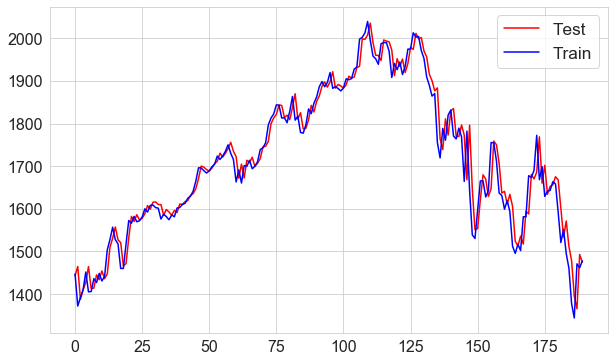

In [51]:
fig = plt.figure(figsize=(10, 6))
plt.plot(test_predict, color='red', label='Test')
plt.plot(scaler.inverse_transform(y_test), color='blue', label='Train')
plt.legend(loc='best')